In [1]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [2]:
# Load the Iris dataset included with scikit-learn
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]
df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#X = df_iris[["petal width","petal length"]]
y= df_iris["target"]
#X = df_iris[["petal width","petal length","sepal width","sepal length"]]



In [27]:
df_iris.head(10)

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


# PCA Exercise
Taking in consideration the iris dataset, answer the following questions. **You may have to run some code first :)**
1. How many **principal components can we consider**?
2. How do you think is going to be the **cumulated percentage of explained variance** attending to the number of components? Calculate it.
3. Consider the necessary number of components to explain at least a **99% of the variance**. Give the equations to calculate these components.
4. Calculate the **new values** for this decomposition and plot them.
5. Repeat the steps 3 and 4 **taking a 95% of the variance**

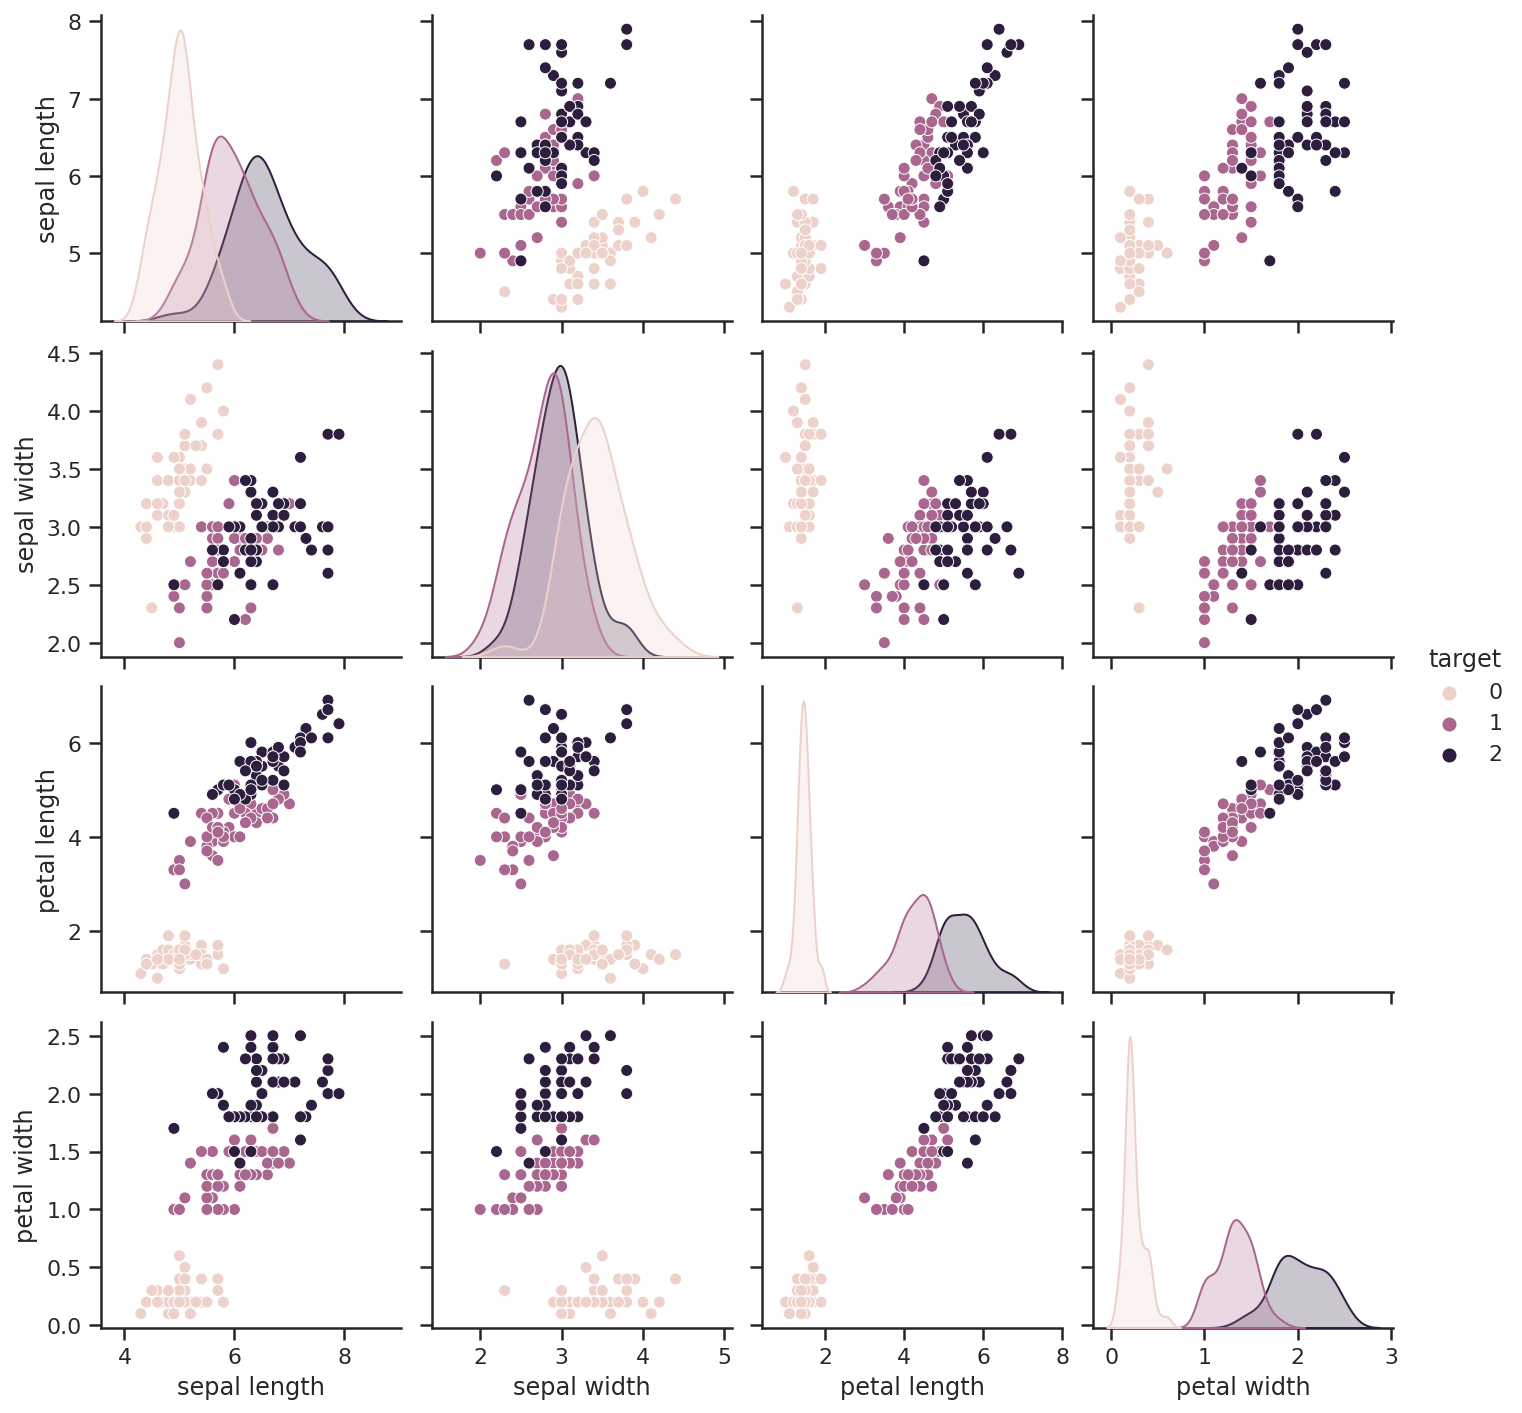

In [28]:
# A graph to help you out
sns.set(style="ticks")
sns.pairplot(data = df_iris.loc[:,:"target"], hue = 'target')

In [29]:
df_iris.corr()

,sepal length,sepal width,petal length,petal width,target
sepal length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Petal width and Petal Length are correlating too much so we can create one column instead of two

In [66]:
X = df_iris[["petal width","petal length"]]
#X = df_iris[["petal width","petal length","sepal width","sepal length"]]
y= df_iris["target"]

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=y, random_state=0)


# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# intialize pca 
pca = PCA(n_components=1)


# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
len(X_train_pca)
    

120

In [65]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

eigen_vals


array([2.93308996, 0.01929637, 0.13232812, 0.94889899])

In [63]:
print(pca.components_)

[[ 0.56811336  0.5819892  -0.24446693  0.52798835]
 [ 0.05169099  0.01776533  0.9326461   0.35662823]
 [ 0.63924135  0.1289128   0.23742596 -0.71998674]
 [ 0.51569928 -0.80271692 -0.11847401  0.27507036]]


In [12]:
# compare it with the original dataframe and to what it corresponds (more or less)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361387         -0.084523           0.856671          0.358289
1           0.656589          0.730161          -0.173373         -0.075481
2          -0.582030          0.597911           0.076236          0.545831
3          -0.315487          0.319723           0.479839         -0.753657


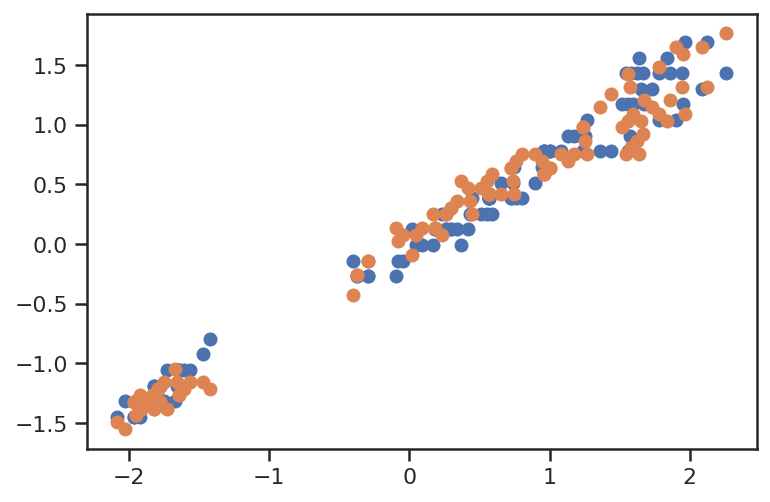

In [132]:
plt.scatter(X_train_pca,X_train_std[:,0])
plt.scatter(X_train_pca,X_train_std[:,1])

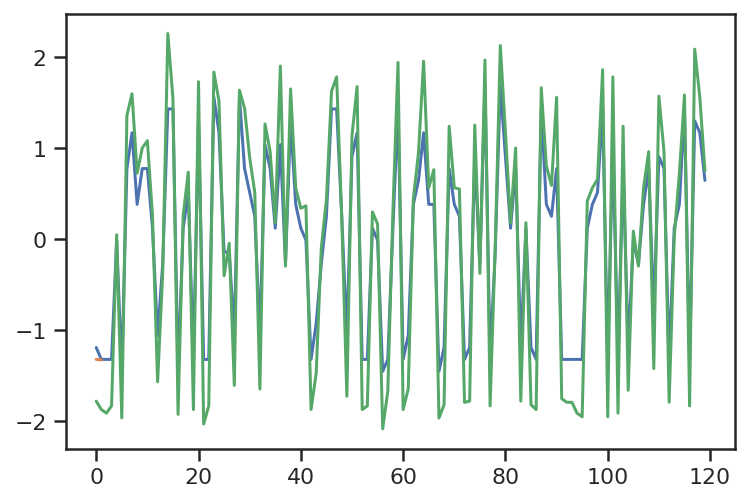

In [127]:

plt.plot(X_train_std[:,0])
plt.plot(X_train_std[1,:])
plt.plot(X_train_pca)

Text(0.5, 1.0, 'PCA')

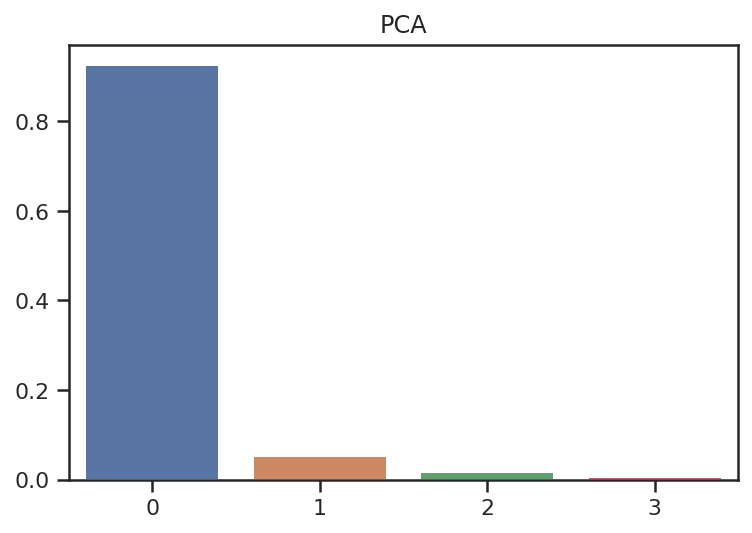

In [15]:
-# plot it!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=796ba814-f632-4502-b0d7-7e2f8f9e546d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>